### Logistic Regression Mathematical Intution and code from scratch

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
from matplotlib import pyplot as plt

x,y = make_classification(n_samples=100,n_features=2,n_informative=1, n_redundant=0,n_classes=2,
                          n_clusters_per_class=1,random_state=41,hypercube=False, class_sep=30)
x.shape, y.shape

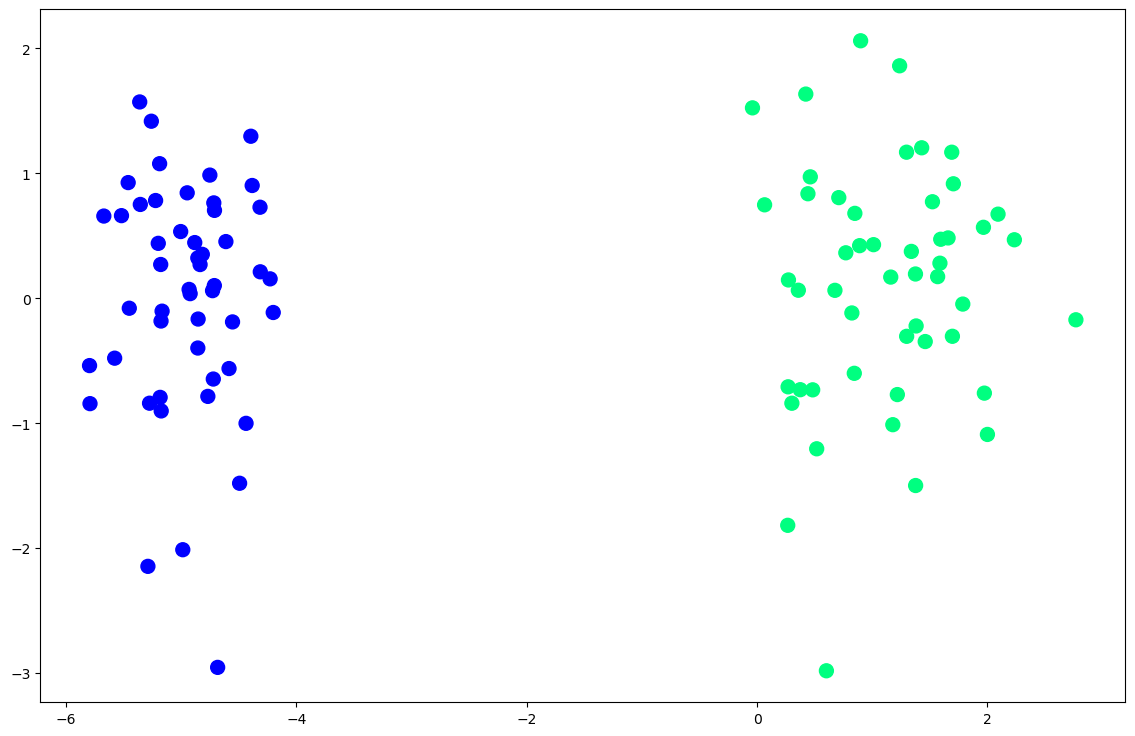

In [140]:
plt.figure(figsize=(14,9))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [174]:
#Logistic regression of SKlearn class
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='none',solver='sag')
LR.fit(x,y)
print(LR.intercept_)
print(LR.coef_)

m = -(LR.coef_[0][0]/LR.coef_[0][1])
b = -(LR.intercept_/LR.coef_[0][1])

print('Intercept of the Logistic Regression model line is:', b)
print('slope of the Logistic Regression model line is:', m)

x_input_LR = np.linspace(-3,3,100)
y_input_LR= m*x_input_LR +b


[4.14119922]
[[4.04173717 0.18382718]]
Intercept of the Logistic Regression model line is: [-22.52767674]
slope of the Logistic Regression model line is: -21.98661393602157


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [156]:
# preception function for intuition of Logistic regression model (Step function)
def preception(x,y,lr):
    x= np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    
    for i in range(2500):
        j= np.random.randint(x.shape[0])
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0], weights[1:]
        
def step(z):
    return 1 if z>0 else 0

intercept_, coeff_ = preception(x,y,0.1)

m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])

print('Intercept of the preception model(step) line is:', b)
print('slope of the preception model(step) line is:', m)

x_input_step = np.linspace(-3,3,100)
y_input_step= m*x_input_step +b

Intercept of the preception model(step) line is: -2.9716568071029252
slope of the preception model(step) line is: -2.7745500252190514


In [157]:
# preception function for intuition of Logistic regression model (Sigmoid function)
def sigmoidpreception(x,y,lr):
    x= np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    
    for i in range(2500):
        j= np.random.randint(x.shape[0])
        y_hat = sigmoid(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0], weights[1:]
        
def sigmoid(z):
    return 1/(1+ np.exp(-z))

intercept_, coeff_ = sigmoidpreception(x,y,0.1)
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])

print('Intercept of the preception model (sigmoid) line is:', b)
print('slope of the preception model line (sigmoid) is:', m)

x_input_sigmoid = np.linspace(-3,3,100)
y_input_sigmoid= m*x_input_sigmoid +b


Intercept of the preception model (sigmoid) line is: -20.67054311362582
slope of the preception model line (sigmoid) is: -16.62534554444017


In [171]:
#actaul mathematics behind logistic regression model
def GDLR(x,y,lr):
    
    x= np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    
    for i in range(2500):
        
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights+lr*(np.dot((y-y_hat),x)/x.shape[0])
        
    return weights[1:], weights[0]

def sigmoid(z):
    return 1/(1+ np.exp(-z))

coef_, intercept= GDLR(x,y,0.5)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input_GDLR = np.linspace(-3,3,100)
y_input_GDLR = x_input_GDLR*m + b


(-3.0, 2.0)

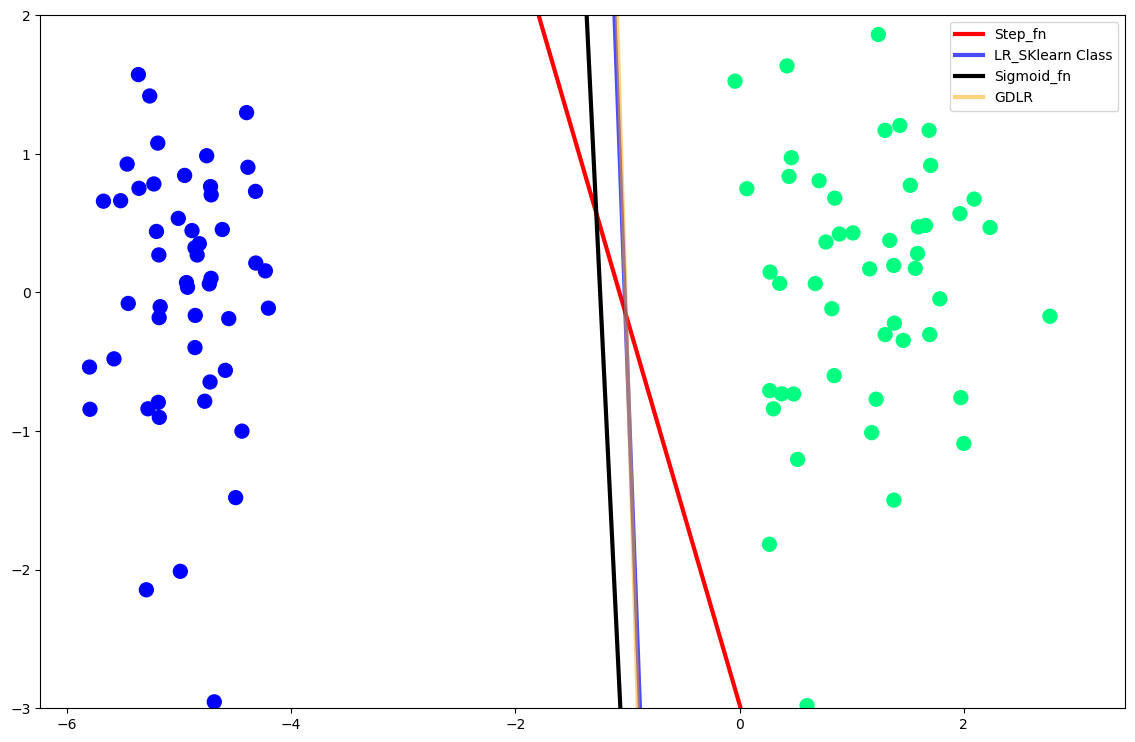

In [177]:
#Line plt of above intutions
plt.figure(figsize=(14,9))
plt.plot(x_input_step,y_input_step,color='red',linewidth=3,label= 'Step_fn')
plt.plot(x_input_LR,y_input_LR,color='blue',linewidth=3,label= 'LR_SKlearn Class',alpha=0.7)
plt.plot(x_input_sigmoid,y_input_sigmoid,color='black',linewidth=3,label= 'Sigmoid_fn')
plt.plot(x_input_GDLR,y_input_GDLR,color='Orange',linewidth=3,label= 'GDLR',alpha=0.5)

plt.legend()

plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)